> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


we here want to know some statistics like that the average runtime is 102 min

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.shape

(10866, 21)

here we have 10866 rows and 21 columns that we want to clean to answer our questions 

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [7]:
df.drop(['imdb_id','homepage','tagline','keywords','overview','vote_count','vote_average','budget_adj','revenue_adj','production_companies'],axis=1,inplace = True)

we have 21 columns and 10866 moives and we want to drop some columns that wont used like imdb_id,original_title,homepage,tagline,keywords,production_companies,overview,vote_count,vote_average, budget_adj and revenue_adj. that we dont need to answer our questions 

In [8]:
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
release_year      10866 non-null int64
dtypes: float64(1), int64(5), object(5)
memory usage: 933.9+ KB


we want here to know if we have null values and the data type of each columns

In [10]:
df[df['budget']==0].count()

id                5696
popularity        5696
budget            5696
revenue           5696
original_title    5696
cast              5631
director          5656
runtime           5696
genres            5674
release_date      5696
release_year      5696
dtype: int64

In [11]:
df[df['revenue']==0].count()

id                6016
popularity        6016
budget            6016
revenue           6016
original_title    6016
cast              5945
director          5973
runtime           6016
genres            5993
release_date      6016
release_year      6016
dtype: int64

In [12]:
df[df['runtime']==0].count()

id                31
popularity        31
budget            31
revenue           31
original_title    31
cast              31
director          29
runtime           31
genres            30
release_date      31
release_year      31
dtype: int64

In [13]:
df['revenue'] = df['revenue'].replace(0, np.NAN)
df['budget'] = df['budget'].replace(0, np.NAN)
df['runtime'] =df['runtime'].replace(0, np.NAN)

In [14]:
df[df.isnull().sum(axis = 1) > 0].shape

(7016, 11)

In [15]:
df.dropna(inplace = True)

In [16]:
df[df.isnull().sum(axis = 1) > 0].shape

(0, 11)

in the last few cells we wanted to know if there 0 values that wont help so we replaced it to nan and drop that values and after droping we want to check if there is more null values or not


In [17]:
df.nunique()

id                3849
popularity        3847
budget             405
revenue           3750
original_title    3803
cast              3828
director          1710
runtime            139
genres            1051
release_date      2881
release_year        56
dtype: int64

In [18]:
df.duplicated().sum()

1

In [19]:
df.drop_duplicates(inplace= True)

In [20]:
print(df.duplicated().sum())

0


we want to know is there is duplicated data or not and if there is we wan to drop it and make sure we drop it by checking if there is a duplicated or not

In [21]:
df.shape

(3849, 11)

after cleaning the data we want to know our rows number and columns number 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

###  most profit and popular from year to year  and which year has the most profit?

In [22]:
df['profit'] = df['revenue'] - df['budget']

In [88]:
most_popular_movies = df.groupby('release_year',as_index=False)['popularity'].max()
most_profit_pop_movies = df.groupby('release_year',as_index=False)[['profit','popularity' ]].sum()


In [89]:
most_popular_movies

,release_year,popularity
0,1960,2.610362
1,1961,2.631987
2,1962,3.170651
3,1963,2.508235
4,1964,3.153791
5,1965,1.910465
6,1966,0.670274
7,1967,2.550704
8,1968,3.309196
9,1969,1.778746


In [121]:
most_profit_pop_movies

,release_year,profit,popularity
0,1960,1.081981e+08,6.622565
1,1961,2.990832e+08,7.877177
2,1962,1.668798e+08,6.884396
3,1963,1.154119e+08,6.243670
4,1964,2.946784e+08,9.644529
5,1965,3.992819e+08,5.274384
6,1966,5.246869e+07,1.975840
7,1967,6.363346e+08,12.400025
8,1968,1.682718e+08,8.221167
9,1969,2.068630e+08,4.611758


In [91]:
 most_popular_movies.max()

release_year    2015.000000
popularity        32.985763
dtype: float64

In [92]:
most_popular_movies.max()[0]

2015.0

In [93]:
df['original_title'][df['popularity'] == most_popular_movies.max()[1]]

0    Jurassic World
Name: original_title, dtype: object

In [123]:
most_profit_pop_movies['release_year'].max()

2015

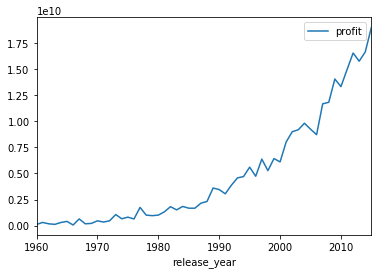

In [95]:
most_profit_pop_movies.plot(x='release_year' , y ='profit' );

In [135]:
most_profit_pop_movies[most_profit_pop_movies['release_year'] == most_profit_pop_movies.max()[0]]

,release_year,profit,popularity
55,2015,1.903215e+10,457.110856


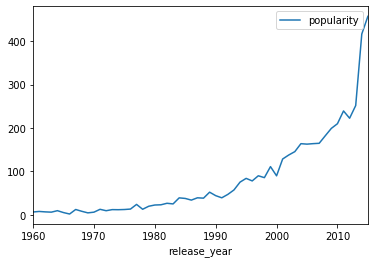

In [97]:
most_pop_movies.plot(x='release_year',y='popularity')

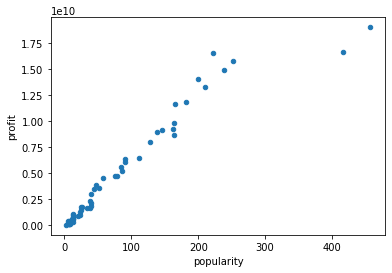

In [102]:
most_profit_pop_movies.plot(x = 'popularity', y='profit' , kind='scatter')

the most profit year is 2015 and aslo has the most popularity. the movie with the most popularity is aslo made in 2015 and its name is Jurassic World. it more the popularity is increased the more the profit has positive correlation with popularity

### average run time ?
we will see average run time and analysis the movie length and their profit

In [35]:
df['runtime'].value_counts()

100.0    125
97.0     113
98.0     102
95.0     101
93.0     101
        ... 
188.0      1
42.0       1
213.0      1
179.0      1
338.0      1
Name: runtime, Length: 139, dtype: int64

 100.0 min is the most between run times

In [41]:
df['runtime'].mean()

109.21745908028059

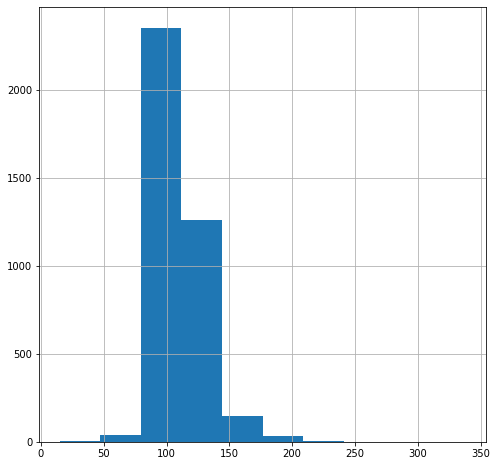

In [116]:
df['runtime'].hist(figsize = (8,8))

most movies has about 109 min averge

### who are the top directors making the most movies and  their movies profits ?

In [104]:
df['director'].value_counts()

Steven Spielberg    27
Clint Eastwood      24
Ridley Scott        21
Woody Allen         18
Martin Scorsese     17
                    ..
Stephen Kessler      1
William Dear         1
Jamie Babbit         1
Paul Brickman        1
Andrew Douglas       1
Name: director, Length: 1710, dtype: int64

In [105]:
most_profit_director = df.groupby('director',as_index=False)[['revenue','budget']].sum()
most_profit_director['profit'] = most_profit_director['revenue'] - most_profit_director['budget']
most_profit_director.sort_values(by=['profit'], inplace=True, ascending= False)

In [106]:
most_profit_director

,director,revenue,budget,profit
1545,Steven Spielberg,9.018564e+09,1.551500e+09,7.467064e+09
1239,Peter Jackson,6.523245e+09,1.326000e+09,5.197245e+09
640,James Cameron,5.841895e+09,7.599000e+08,5.081995e+09
1065,Michael Bay,4.917208e+09,1.360000e+09,3.557208e+09
381,David Yates,4.154296e+09,7.750000e+08,3.379296e+09
...,...,...,...,...
58,Andrei Konchalovsky,2.411497e+07,9.900000e+07,-7.488503e+07
1670,Walter Hill|Jack Sholder,1.482808e+07,9.000000e+07,-7.517192e+07
333,David Bowers|Sam Fell,6.445932e+07,1.490000e+08,-8.454068e+07
2,Aaron Blaise|Robert Walker,2.500000e+02,1.000000e+08,-9.999975e+07


In [107]:
print( "the most profit director " , most_profit_director['director'][most_profit_director['profit'].idxmax()] , "and his movies profit" , most_profit_director['profit'][most_profit_director['profit'].idxmax()]  ,"and he has the most movies he directed about " , df['director'].value_counts()[0]," movies")

the most profit director  Steven Spielberg and his movies profit 7467063772.0 and he has the most movies he directed 27  movies


<a id='conclusions'></a>
## Conclusions
after complete  the steps of data analysis we conclude that : </br>
<br> 1.he most profit year is 2015 and aslo has the most popularity </br>
<br> 2.there is relationship between the profit and popularity</br>
<br> 3.the profit is increasing and becoming more profitable from year to year </br></br>
<br> 4.the movies industry is becoming more popular from year to year </br>
<br> 5.most movies has about 109 min averge</br></br>
<br> 6.the most profit director  Steven Spielberg and he has the most movies he directed about 27  movies</br>